
# MACHINE LEARNING Diabetes  Prediction Notebook
#### Done by Oo Lwin 


### Supervised Learning(Classification) Task on Pima Indian Diabetes Dataset

https://www.openml.org/search?type=data&status=active&id=43582

##### Problem Statement
Develop a machine learning model to predict the onset of diabetes in individuals based on medical and demographic features such as age, BMI, insulin levels, and family history. This model aims to improve early diagnosis and intervention for better patient outcomes, allowing healthcare providers to implement personalized treatment plans and educate high-risk individuals on lifestyle modifications to prevent or delay the onset of diabetes.

### Machine Learning Workflow for supervised learning

###### Data Set -> Data Pre-processing -> Data Analysis -> Train Test Split -> Feed to various models -> evaluation  

In [159]:
#importing the necessary libraries 
#Pre Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings #to avoid memory leak warning in jupyter
warnings.filterwarnings('ignore')

#Classification
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score




In [160]:
dataset = pd.read_csv("diabetes.csv")

In [161]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [162]:
dataset = dataset.drop(['DiabetesPedigreeFunction','SkinThickness'],axis=1)

In [163]:
dataset.describe([])

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,79.799479,31.992578,33.240885,0.348958
std,3.369578,31.972618,19.355807,115.244002,7.884160,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.000000,29.000000,0.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,81.000000,1.000000


From the description above, we can see that there are min values of 0 for columns Pregnances to BMI. While it makes sense for Pregnancies to be 0 , it does not make sense for rest of the columns to have a min of "0", Hence we will have to impute them with mean values of the respective columns.

Columns to imput mean for min 0 values :
1. Glucose
2. BloodPressure
4. Insulin
5. BMI

In [164]:
#checking the shape before we drop duplicates
dataset.shape

(768, 7)

In [165]:
dataset = dataset.drop_duplicates()
dataset.shape

#No change in rows before and after, hence there was no duplicates.

(768, 7)

In [166]:
#Checking Null values

dataset.isnull()
dataset.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64

In [167]:
#Checking the number of zero values in the min 0 columns above.

#creating a df with respective columns only
dataset_0columns = dataset.iloc[:,[1,2,3,4,5]]


for i in dataset_0columns.columns:
    print('No. of zero values in ' + i + ' is', dataset_0columns[dataset_0columns[i]==0].shape[0])

No. of zero values in Glucose is 5
No. of zero values in BloodPressure is 35
No. of zero values in Insulin is 374
No. of zero values in BMI is 11
No. of zero values in Age is 0


In [168]:
#We will replace the 0 values in respective columns with the mean.
for i in dataset.iloc[:,[1,2,3,4,5]]:
    dataset[i]=dataset[i].replace(0,dataset[i].mean())
    
#We have replaced the 0 values with the mean in the respective columns.

dataset.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,118.660163,32.450805,33.240885,0.348958
std,3.369578,30.436016,12.115932,93.080358,6.875374,11.760232,0.476951
min,0.000000,44.000000,24.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,79.799479,27.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,79.799479,32.000000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,81.000000,1.000000


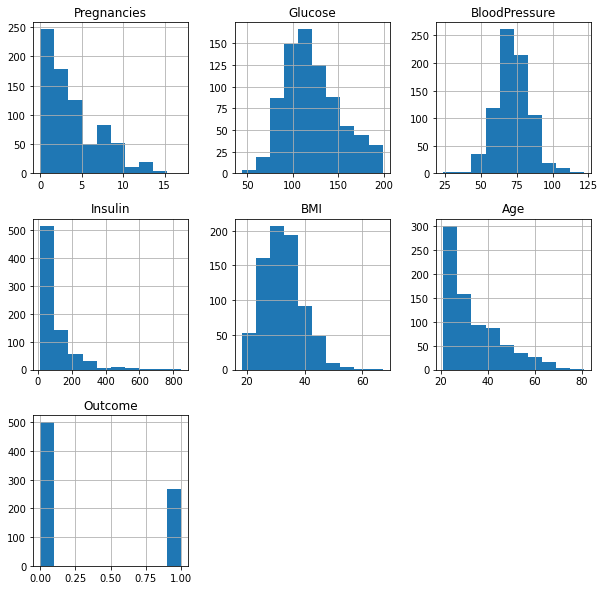

In [169]:
histogram = dataset.hist(bins=10,figsize=(10,10))

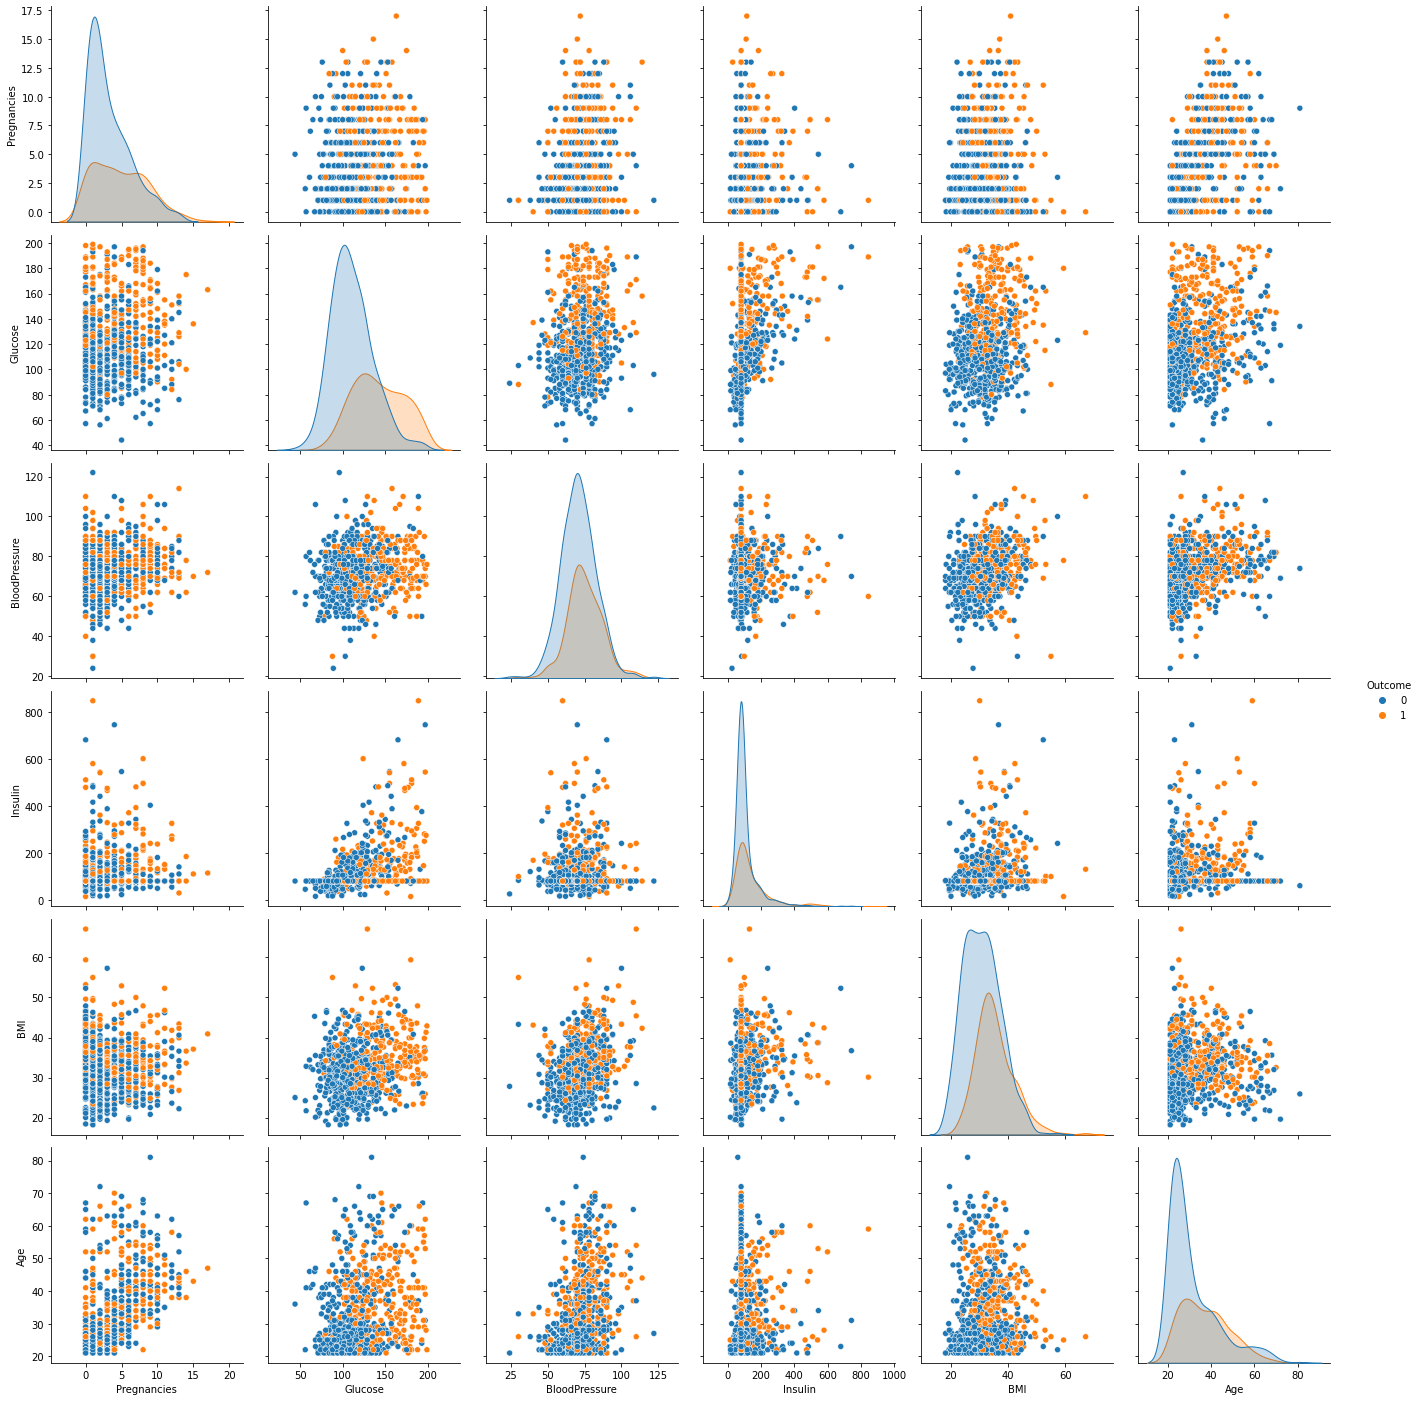

In [170]:
pairplot = sns.pairplot(dataset,hue='Outcome')
pairplot = pairplot.fig.set_size_inches(20,20)



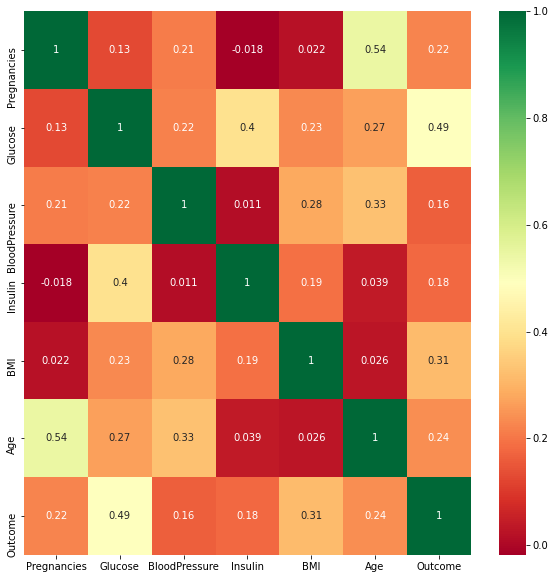

In [171]:
#Correlation Analysis

corr = dataset.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(corr,annot=True,cmap="RdYlGn")


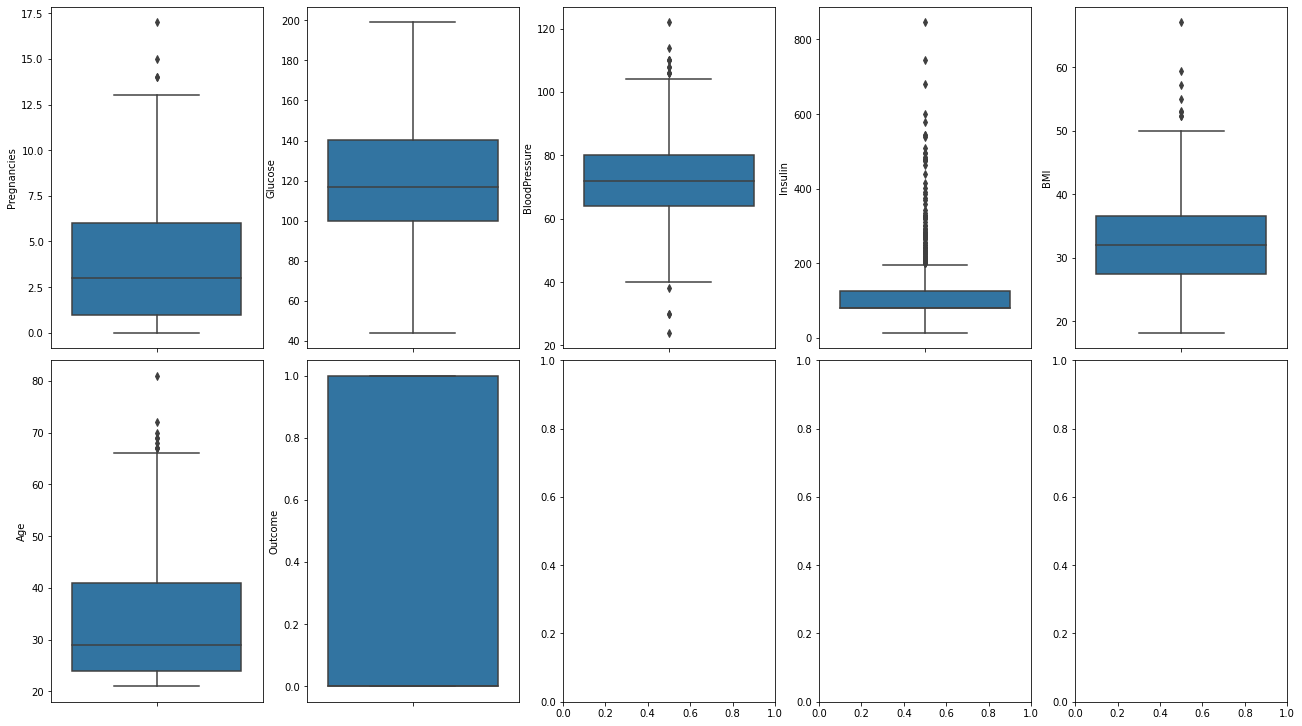

In [172]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(18, 10))
ax = ax.flatten()
n_index = 0
for i in dataset.columns:
  sns.boxplot(y=i,data=dataset, ax=ax[n_index])
  n_index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [173]:
#running a loop to detect the number of outliers

for i in dataset.columns:
    dataset.sort_values(by=i,ascending=True,na_position='last')
    q1 = np.nanpercentile(dataset[i],25)
    q3 = np.nanpercentile(dataset[i],75)
    iq_range = q3 - q1
    upper_bound = q3 + (iq_range*1.5)
    lower_bound = q1-(iq_range*1.5)
    outlier_data = dataset[i][(dataset[i] < lower_bound) | (dataset[i] > upper_bound)]
    percentage = (outlier_data.count()/dataset[i].count())*100
    print(f"{round(percentage,2)}% of the data in {i} are outliers, with a count of {outlier_data.count()}")

    
    
   
    

0.52% of the data in Pregnancies are outliers, with a count of 4
0.0% of the data in Glucose are outliers, with a count of 0
1.82% of the data in BloodPressure are outliers, with a count of 14
11.59% of the data in Insulin are outliers, with a count of 89
1.04% of the data in BMI are outliers, with a count of 8
1.17% of the data in Age are outliers, with a count of 9
0.0% of the data in Outcome are outliers, with a count of 0


In [174]:
# Calculate the quartiles and IQR for the 'Insulin' column
insulin_sorted = dataset['Insulin'].sort_values(ascending=True, na_position='last')
insulin_q1 = np.nanpercentile(insulin_sorted, 25)
insulin_q3 = np.nanpercentile(insulin_sorted, 75)
insulin_iqr = insulin_q3 - insulin_q1

# Compute the extreme lower and upper bounds
insulin_extreme_lower_bound = insulin_q1 - (insulin_iqr * 3)
insulin_extreme_upper_bound = insulin_q3 + (insulin_iqr * 3)

# Identify outliers in the 'Insulin' column
insulin_outliers = (dataset['Insulin'] < insulin_extreme_lower_bound) | (dataset['Insulin'] > insulin_extreme_upper_bound)
insulin_outliers_vector = dataset['Insulin'][insulin_outliers]

# Replace outliers with the mean of the 'Insulin' column
insulin_mean = dataset['Insulin'].mean()
dataset.loc[insulin_outliers, 'Insulin'] = insulin_mean

In [175]:
#splitting the dataset into predictor and target variables.

X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

In [176]:
X

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,Age
0,6,148.0,72.0,79.799479,33.6,50
1,1,85.0,66.0,79.799479,26.6,31
2,8,183.0,64.0,79.799479,23.3,32
3,1,89.0,66.0,94.000000,28.1,21
4,0,137.0,40.0,168.000000,43.1,33
...,...,...,...,...,...,...
763,10,101.0,76.0,180.000000,32.9,63
764,2,122.0,70.0,79.799479,36.8,27
765,5,121.0,72.0,112.000000,26.2,30
766,1,126.0,60.0,79.799479,30.1,47


In [177]:
#Using VIF to check for multicollinearity. 
# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X))

         feature        VIF
0    Pregnancies   3.262000
1        Glucose  19.952126
2  BloodPressure  31.281532
3        Insulin   7.081544
4            BMI  23.777947
5            Age  14.187728


In [178]:
#applying scaling 

scaler = StandardScaler()
X = scaler.fit_transform(X)

#Y = scaler.fit_transform((Y.values).reshape(-1,1))

#We will not scale our target variable as we want to keep the values to 0 and 1.

### Train Test Split

In [179]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.7,random_state=52)

In [180]:

pca = PCA(n_components=0.95)  # Retain 95% of the variance in the original data
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [181]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((537, 6), (537,), (231, 6), (231,))

### Building Classification Algorithms

In [182]:
#Random Forest 

rf = RandomForestClassifier(random_state=99)
rf_model = rf.fit(X_train,Y_train)

In [183]:
#Logistic Regression

logr = LogisticRegression(random_state=99)
logr_model = logr.fit(X_train,Y_train)

In [184]:
#Support Vector Machine 

svm = SVC(probability=True,random_state=99)
svm_model = svm.fit(X_train,Y_train)

In [185]:
#K-Nearest Neighbor

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,Y_train)

In [186]:
#Naive Bayes 

nb = GaussianNB()
nb_model = nb.fit(X_train,Y_train)

Making predictions using the respective models

In [187]:
rf_pred = rf_model.predict(X_test)
logr_pred = logr_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

In [188]:
classifiers = [rf,logr,svm,knn,nb]
models = [rf_model,logr_model,svm_model,knn_model,nb_model]
preds = [rf_pred,logr_pred,svm_pred,knn_pred,nb_pred]
model_names =["Random Forest", "Logistic Regression", "Support Vector Machine","K-Nearest Neighbor", "Naive Bayes"]

In [189]:
for (i , j ,h) in zip(model_names,classifiers,preds):
    print("Train Accuracy of" ,i , round(j.score(X_train,Y_train)*100,2))
    print("Test Accuracy of" ,i , round(j.score(X_test,Y_test)*100,2))
    print("Accuracy Score of" ,i , round(accuracy_score(Y_test,h)*100,2))
    print("-------------------------------------------------")

Train Accuracy of Random Forest 100.0
Test Accuracy of Random Forest 71.43
Accuracy Score of Random Forest 71.43
-------------------------------------------------
Train Accuracy of Logistic Regression 76.72
Test Accuracy of Logistic Regression 78.35
Accuracy Score of Logistic Regression 78.35
-------------------------------------------------
Train Accuracy of Support Vector Machine 82.5
Test Accuracy of Support Vector Machine 73.59
Accuracy Score of Support Vector Machine 73.59
-------------------------------------------------
Train Accuracy of K-Nearest Neighbor 83.8
Test Accuracy of K-Nearest Neighbor 70.13
Accuracy Score of K-Nearest Neighbor 70.13
-------------------------------------------------
Train Accuracy of Naive Bayes 75.05
Test Accuracy of Naive Bayes 75.32
Accuracy Score of Naive Bayes 75.32
-------------------------------------------------


### Precision Score , F1 score , Accuracy Score

In [190]:
for (i , j ) in zip(model_names,preds):
    print(f"Precision Score of {i} is {round(precision_score(Y_test,j)*100,2)}")
    print("-----------------------------------------------------------")

    #Since we are using binary class, we do not have to evaluate the micro average precision, 
    #macro average precision , weighted average precision and precision score on non weighted"
    

Precision Score of Random Forest is 56.76
-----------------------------------------------------------
Precision Score of Logistic Regression is 68.06
-----------------------------------------------------------
Precision Score of Support Vector Machine is 60.27
-----------------------------------------------------------
Precision Score of K-Nearest Neighbor is 54.43
-----------------------------------------------------------
Precision Score of Naive Bayes is 63.77
-----------------------------------------------------------


In [191]:
for (i , j ) in zip(model_names,preds):
    print(f"Classification report of {i}  \n{classification_report(Y_test,j,digits=3)}")
    print("------------------------------------------------------------------------")

Classification report of Random Forest  
              precision    recall  f1-score   support

           0      0.783     0.794     0.788       155
           1      0.568     0.553     0.560        76

    accuracy                          0.714       231
   macro avg      0.676     0.673     0.674       231
weighted avg      0.712     0.714     0.713       231

------------------------------------------------------------------------
Classification report of Logistic Regression  
              precision    recall  f1-score   support

           0      0.830     0.852     0.841       155
           1      0.681     0.645     0.662        76

    accuracy                          0.784       231
   macro avg      0.755     0.748     0.751       231
weighted avg      0.781     0.784     0.782       231

------------------------------------------------------------------------
Classification report of Support Vector Machine  
              precision    recall  f1-score   support

       

ROC & AUC Curve

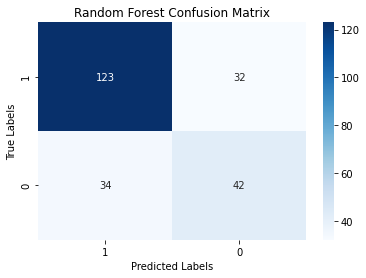

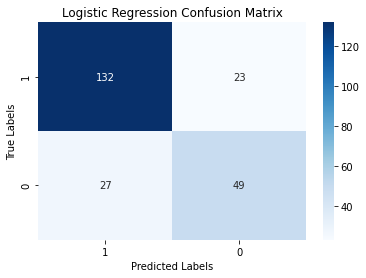

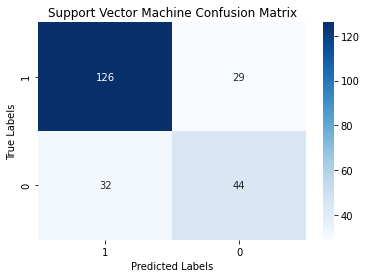

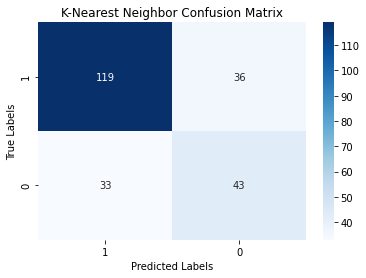

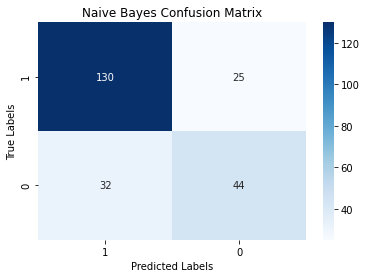

In [192]:
models = {
    'Random Forest': rf_model,
    'Logistic Regression': logr_model,
    'Support Vector Machine': svm_model,
    'K-Nearest Neighbor': knn_model,
    'Naive Bayes': nb_model
}

# Function to plot confusion matrix for each model using seaborn
def plot_confusion_matrices(models, X_test, y_test):
    for name, model in models.items():
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '0'], yticklabels=['1', '0'])
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.title(f'{name} Confusion Matrix')
        plt.show()

# Call the function to plot confusion matrices using seaborn
plot_confusion_matrices(models, X_test, Y_test)

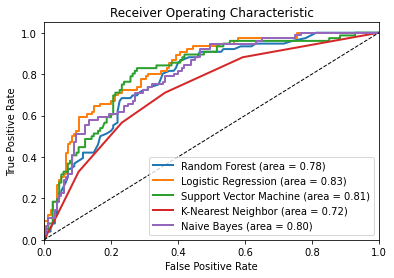

In [193]:
# Function to plot ROC curve for each model
def plot_roc_curves(models, X_test, Y_test):
    plt.figure()
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Call the function to plot ROC curves
plot_roc_curves(models, X_test, Y_test)

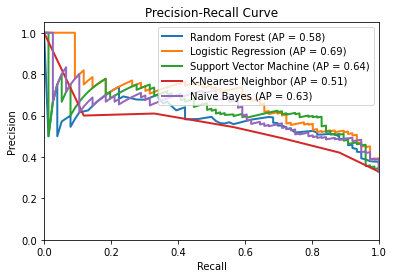

In [194]:
def plot_precision_recall_curves(models, X_test, Y_test):
    plt.figure()
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(Y_test, y_pred_proba)
        average_precision = average_precision_score(Y_test, y_pred_proba)
        plt.plot(recall, precision, lw=2, label=f'{name} (AP = {average_precision:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="upper right")
    plt.show()
plot_precision_recall_curves(models, X_test, Y_test)

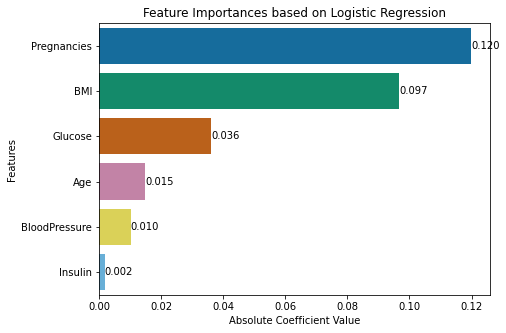

In [195]:
X_original = dataset.iloc[:,:-1]

# Train logistic regression on the original features
logr_original = LogisticRegression(random_state=99)
logr_original.fit(X_original, Y)

# Get the coefficients
coefficients_original = pd.Series(logr_original.coef_[0], index=X_original.columns)
abs_coefficients_original = coefficients_original.abs().sort_values(ascending=False)

# Set the custom color palette
colors = ["#0072B2", "#009E73", "#D55E00", "#CC79A7", "#F0E442", "#56B4E9"]
palette = sns.color_palette(colors)

# Create the bar plot
fig, ax = plt.subplots(figsize=(7, 5))
bar_plot = sns.barplot(x=abs_coefficients_original, y=abs_coefficients_original.index, palette=palette, ax=ax)
ax.set_title('Feature Importances based on Logistic Regression')
ax.set_xlabel('Absolute Coefficient Value')
ax.set_ylabel('Features')

# Add labels to the bars
for p in bar_plot.patches:
    width = p.get_width()
    bar_plot.annotate('{:.3f}'.format(width), (width, p.get_y() + p.get_height() / 2), ha="left", va="center")

# Display the plot
plt.show()

In [227]:
input_data = (5,5,5,5,5,5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logr_model.predict(input_data_reshaped)

if (prediction[0] ==0):
    print("This person is not diabetic.")
else:
    print("This person is diabetic.")

This person is not diabetic.


### Saving the trained model (Logistic Regression)

In [228]:
import pickle

In [229]:
model = 'trained_model.sav'
pickle.dump(logr_model,open(model,'wb'))

In [232]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [234]:
input_data = (5,5,5,5,5,5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)

if (prediction[0] ==0):
    print("This person is not diabetic.")
else:
    print("This person is diabetic.")

This person is not diabetic.
